In [13]:
from sklearn.datasets import make_regression
X_train, Y_train = make_regression(n_samples=300, n_features=2, n_informative=2, noise=5, bias=30, random_state=200)

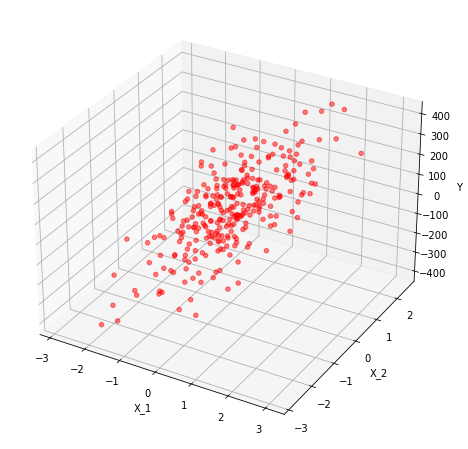

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0],X_train[:,1],Y_train, c = "red",alpha=.5, marker = 'o')
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
plt.show()

In [5]:
#feature scaling
def normalize(X):
    x1_min = min(X_train[:,0])
    x1_max = max(X_train[:,0])
    
    f = lambda x: (x - x1_min)/(x1_max - x1_min)
    X[:,0] = f(X[:,0])

    x2_min = min(X_train[:,1])
    x2_max = max(X_train[:,1])
    
    f = lambda x: (x - x2_min)/(x2_max - x2_min)
    X[:,1] = f(X[:,1])
    
    return X

In [6]:
X = normalize(X_train)
print(X[0:5])

[[0.59987983 0.70438379]
 [0.22476575 0.2065585 ]
 [0.42582798 0.14400726]
 [0.60646637 0.58589566]
 [0.35477231 0.56762558]]


In [7]:
#heart of knn
def find_neighbors(k, X_tr, new_point):
    neighbor_arr = []
    for i in range(len(X_tr)):
        dist = np.sqrt(sum(np.square(X_tr[i]-new_point)))
        neighbor_arr.append([i, dist])
    neighbor_arr = sorted(neighbor_arr, key = lambda x : x[1])
    
    return neighbor_arr[0:k]

In [17]:
#Regression with KNN
def regressor(neighbor_arr):
    y_arr = [Y_train[i[0]] for i in neighbor_arr]
    avg_y = np.mean(y_arr)
    return avg_y

In [18]:
new_points = np.array([[-1, 1],
                      [0, 2],
                      [-3, -2],
                      [3, -3]])

knn = find_neighbors(3, X_train, new_points[1])
regressor(knn)

214.237541575631